In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from matplotlib.ticker import PercentFormatter
import math

In [68]:
pd.set_option('display.max_columns', None)
df = pd.read_excel("D:\Machine learning\coding\premimums_young.xlsx")
# print(df.head(5))
print(df.shape)


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Shiwan\AppData\Local\Temp\ipykernel_3160\80149020.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_excel("D:\Machine learning\coding\premimums_young.xlsx")


(20096, 13)


In [69]:

# Set options for tabular display
pd.set_option('display.max_columns', None)       # Show all columns
pd.set_option('display.width', None)             # Auto-detect width
pd.set_option('display.max_rows', None)          # Show all rows
pd.set_option('display.expand_frame_repr', True) # Expand table across the screen 

In [70]:
df.columns=df.columns.str.replace(' ','_').str.lower()
df.head(1)



,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [71]:
print(df.isna().sum())

df.dropna(inplace=True)
print(df.isna().sum())

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64


In [72]:
print(df.duplicated().sum())  #### it will give total number of duplicated rows
df.drop_duplicates(inplace=True)  ### if duplicated rows are present use this to drop them
df.duplicated().sum()

0


0

In [73]:
print(df.describe())

                age  number_of_dependants  income_lakhs  annual_premium_amount
count  20090.000000          20090.000000  20090.000000           20090.000000
mean      21.494375              0.718019     22.510851            8142.096267
std        2.294052              0.940713     23.420493            2749.906347
min       18.000000             -3.000000      1.000000            3501.000000
25%       19.000000              0.000000      6.000000            6022.250000
50%       22.000000              0.000000     16.000000            7939.000000
75%       23.000000              1.000000     31.000000            9561.000000
max       25.000000              3.000000    790.000000           18186.000000


In [74]:
print(df[df.number_of_dependants<0].shape)

(22, 13)


In [75]:
df[df.number_of_dependants<0].number_of_dependants.unique()

array([-3, -1], dtype=int64)

In [76]:

df.number_of_dependants = abs(df.number_of_dependants)
print(df.number_of_dependants.describe())

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64


In [77]:
numeric_columns =df.select_dtypes(['Float64','int64']).columns
print(numeric_columns)

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')


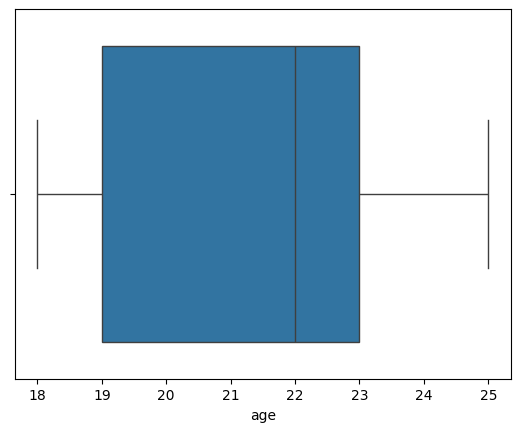

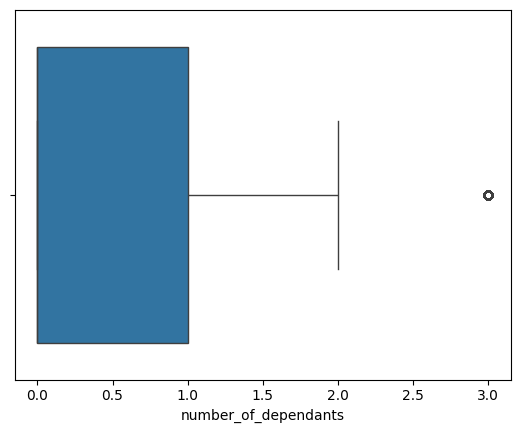

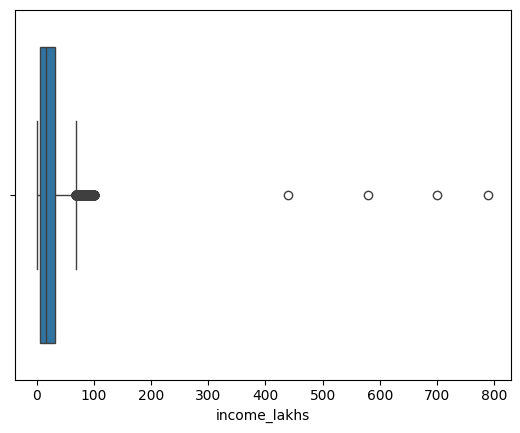

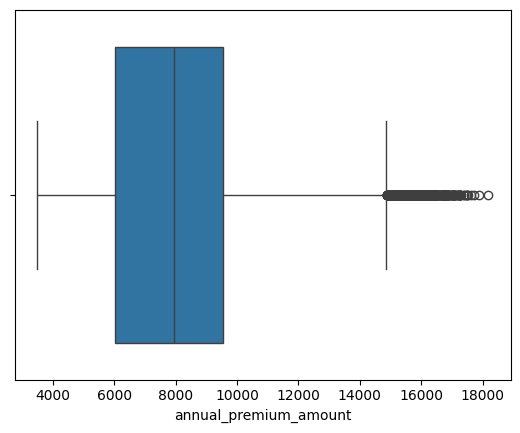

In [78]:
for col in numeric_columns:   ### boxplot is use to detect outliers
   sns.boxplot(x=df[col])
   plt.show()

In [79]:
print(df[df.age>100].age.unique())

[]


In [80]:
df1 = df[df.age<=100].copy()
print(df1.describe())

                age  number_of_dependants  income_lakhs  annual_premium_amount
count  20090.000000          20090.000000  20090.000000           20090.000000
mean      21.494375              0.722598     22.510851            8142.096267
std        2.294052              0.937200     23.420493            2749.906347
min       18.000000              0.000000      1.000000            3501.000000
25%       19.000000              0.000000      6.000000            6022.250000
50%       22.000000              0.000000     16.000000            7939.000000
75%       23.000000              1.000000     31.000000            9561.000000
max       25.000000              3.000000    790.000000           18186.000000


In [81]:
print(df1.income_lakhs.quantile([0.25,0.75]))

0.25     6.0
0.75    31.0
Name: income_lakhs, dtype: float64


In [82]:
def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5 *IQR
    upper_bound = Q1 +1.5 *IQR
    return lower_bound,upper_bound

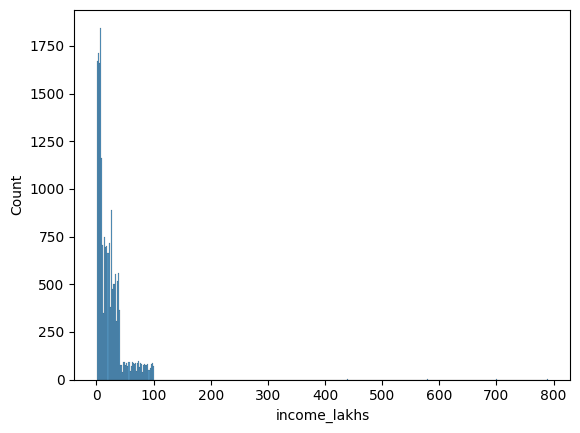

In [83]:
sns.histplot(df1.income_lakhs)
plt.show()

In [84]:
quantile_threshold = df.income_lakhs.quantile(0.999)
print(quantile_threshold)

100.0


In [85]:
print(df1[df1. income_lakhs> quantile_threshold].shape)

(4, 13)


In [86]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
print(df2.describe())

                age  number_of_dependants  income_lakhs  annual_premium_amount
count  20086.000000          20086.000000  20086.000000           20086.000000
mean      21.494474              0.722742     22.390371            8141.799263
std        2.294248              0.937238     21.732062            2749.912486
min       18.000000              0.000000      1.000000            3501.000000
25%       19.000000              0.000000      6.000000            6022.000000
50%       22.000000              0.000000     16.000000            7939.000000
75%       23.000000              1.000000     31.000000            9561.000000
max       25.000000              3.000000    100.000000           18186.000000


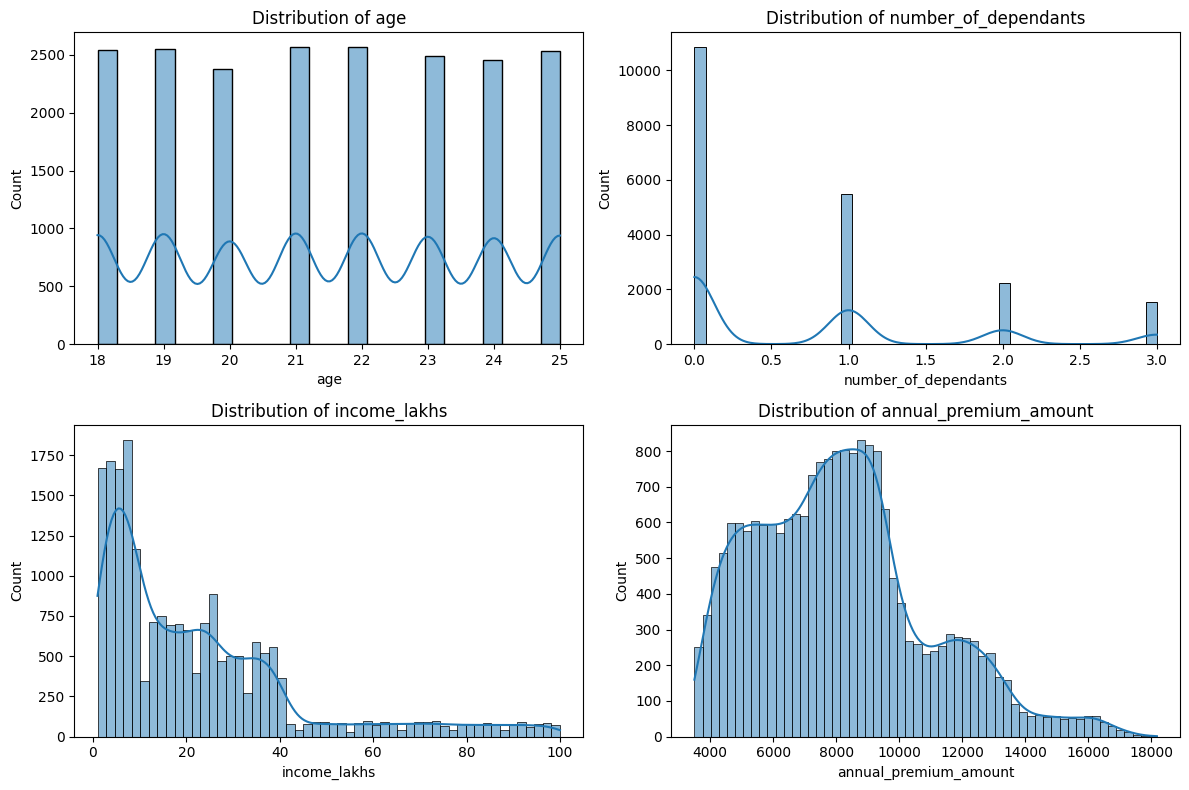

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten to easily index
for i, col in enumerate(numeric_columns[:4]):  # Make sure to use only 4 columns
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

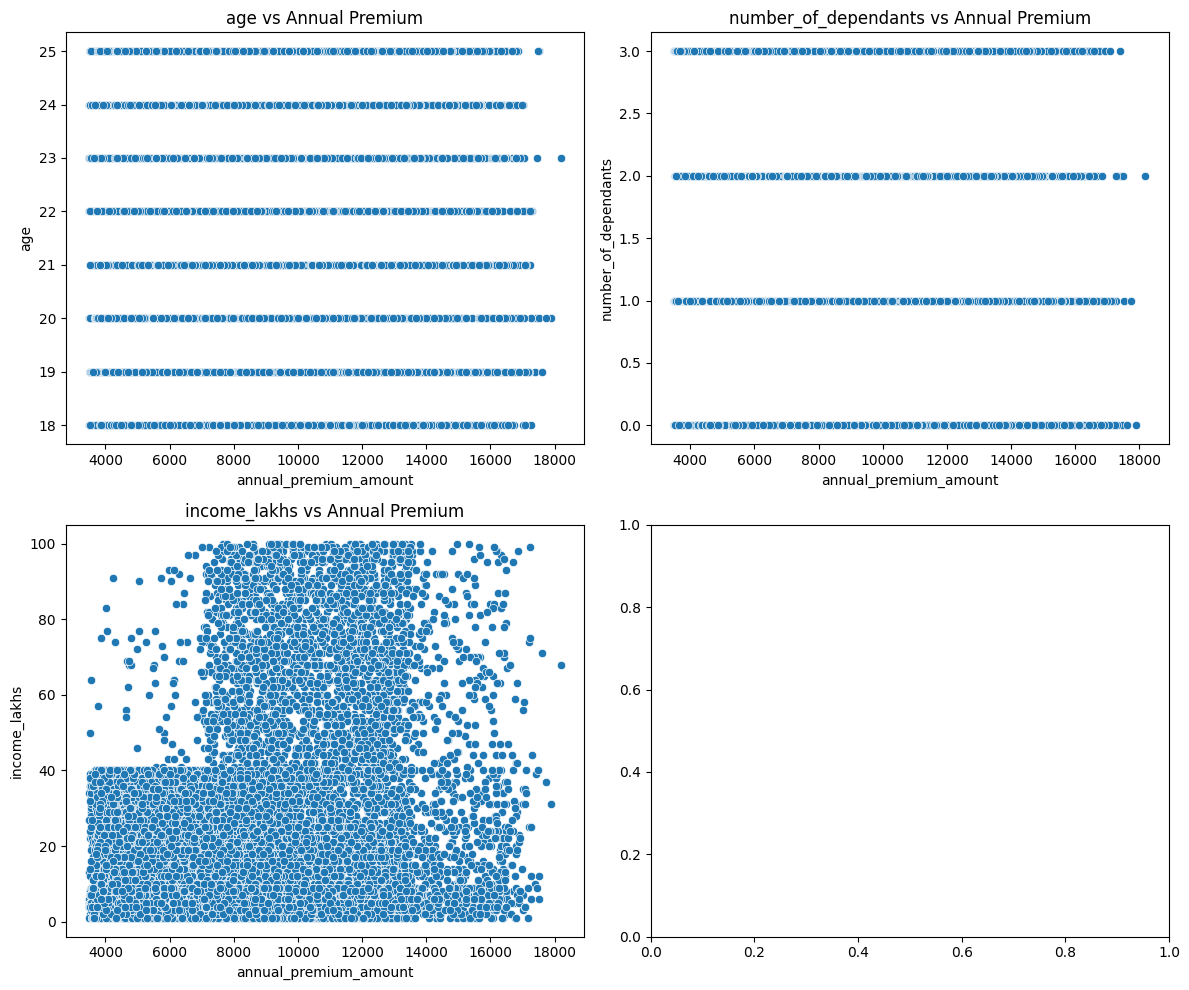

In [88]:
from itertools import combinations

y_columns = [col for col in numeric_columns if col != 'annual_premium_amount'][:4]  # First 4

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(y_columns):
    sns.scatterplot(data=df2, x='annual_premium_amount', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Annual Premium')

plt.tight_layout()
plt.show()


In [89]:

print(df2.columns)

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')


In [90]:
categorical_cols = [ 'gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level','medical_history', 'insurance_plan']

In [91]:
for col in categorical_cols:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [92]:
df2["smoking_status"].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
},inplace=True)
print(df2.smoking_status.unique())

['Regular' 'No Smoking' 'Occasional']


C:\Users\Shiwan\AppData\Local\Temp\ipykernel_3160\1605265585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["smoking_status"].replace({


In [93]:
pct_count =df2.gender.value_counts(normalize=True)
print(pct_count)

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64


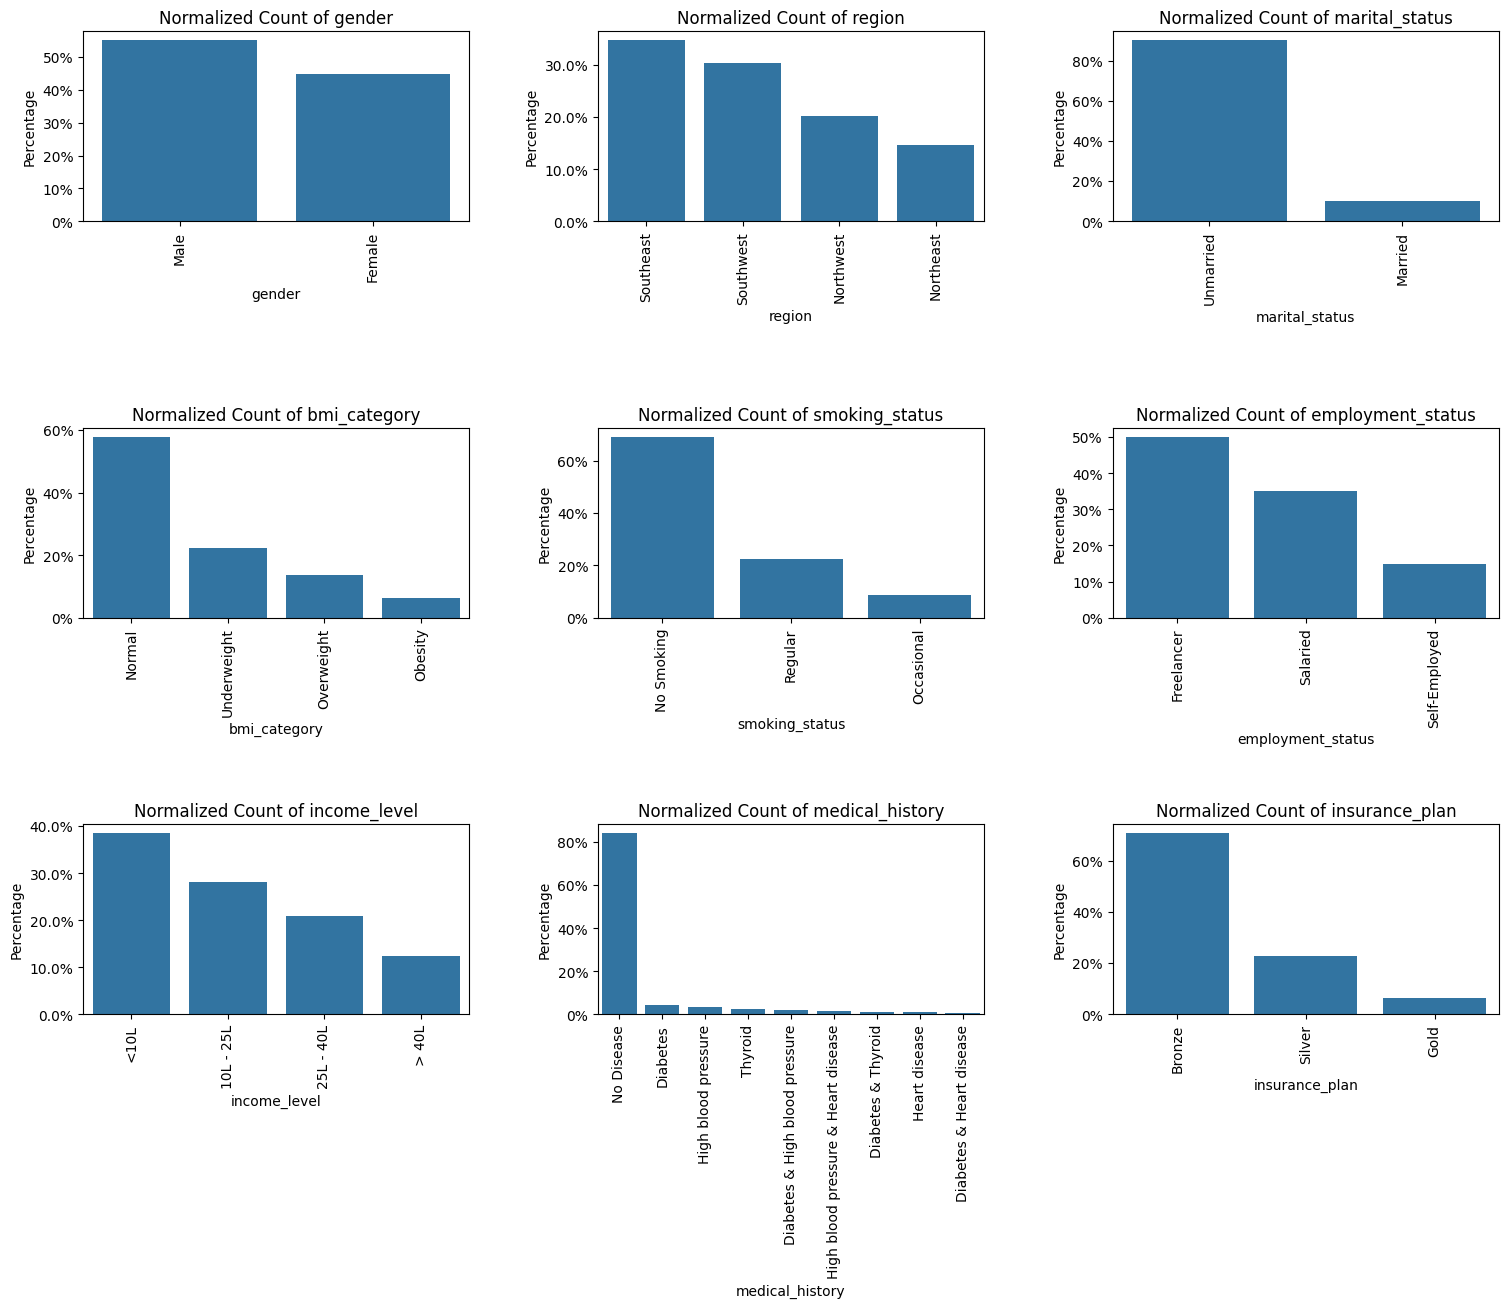

In [94]:
# Set up a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(16, 14))  # Increased figure size
axes = axes.flatten()

# Plot each column's normalized value counts
for i, col in enumerate(categorical_cols):
    normalized_counts = df2[col].value_counts(normalize=True).reset_index()
    normalized_counts.columns = [col, 'percentage']
    
    sns.barplot(data=normalized_counts, x=col, y='percentage', ax=axes[i])
    axes[i].set_title(f'Normalized Count of {col}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate labels for better readability
    axes[i].set_ylabel('Percentage')
    axes[i].yaxis.set_major_formatter(PercentFormatter(1.0))  # Format y-axis as percent

# Adjust layout to avoid overlap
plt.tight_layout(pad=4.0)  # Increase padding between plots
plt.show()


In [95]:
crosstab=pd.crosstab(df2.income_level,df2.insurance_plan )
print(crosstab)

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


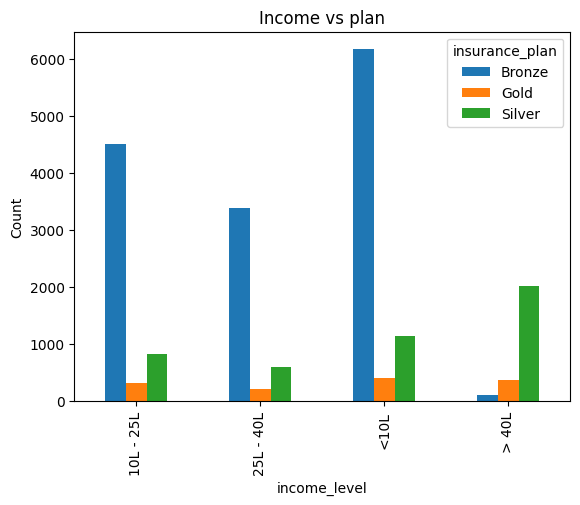

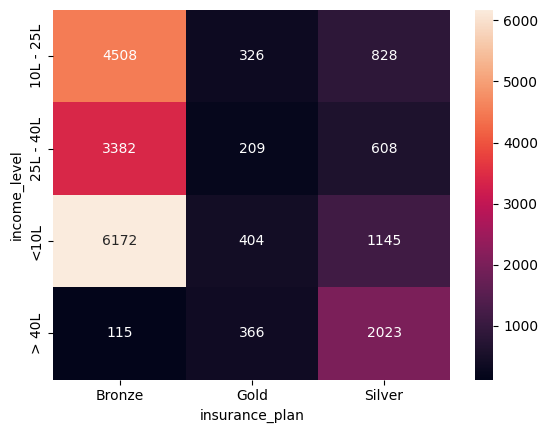

In [96]:
crosstab.plot(kind="bar")
plt.title("Income vs plan")
plt.ylabel("Count")
plt.show()

sns.heatmap(crosstab,annot=True,fmt="d")
plt.show()


### Feature Engineering

In [97]:
risk_scores = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

In [98]:
df2[["diseases1", "diseases2"]] = (
    df2['medical_history']
    .str.lower()
    .str.split("&", expand=True)
    .apply(lambda x: x.str.strip())
)


In [99]:
df2['diseases1'].fillna('none', inplace=True)
df2['diseases2'].fillna('none', inplace=True)

C:\Users\Shiwan\AppData\Local\Temp\ipykernel_3160\668133296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['diseases1'].fillna('none', inplace=True)
C:\Users\Shiwan\AppData\Local\Temp\ipykernel_3160\668133296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [100]:
df2['total_risk_score'] = 0
for disease_col in ['diseases1', 'diseases2']:
    df2['total_risk_score'] += df2[disease_col].map(risk_scores)


In [101]:
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
print("Max score:", max_score)
print("Min score:", min_score)

Max score: 14
Min score: 0


In [102]:
df2['normalized_risk_score'] = (df2["total_risk_score"] - min_score) / (max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,diseases1,diseases2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0,0.000000


In [103]:
print(df2.insurance_plan.unique())
print('\n')
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
print(df2.insurance_plan.unique())

['Silver' 'Bronze' 'Gold']


[2 1 3]


In [104]:
##### LABLE ENCODING OF INCOME_LEVEL
print(df2.income_level.unique())
df2['income_level'] = df2['income_level'].map({'<10L':1 , '10L - 25L':2 , '25L - 40L':3,'> 40L':4 })
print(df2.income_level.unique())
df2.head()

['> 40L' '<10L' '10L - 25L' '25L - 40L']
[4 1 2 3]


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,diseases1,diseases2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,no disease,none,0,0.000000


In [105]:
##### ONE HOT ENCODING
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 =pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,diseases1,diseases2,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,no disease,none,0,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,no disease,none,0,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,no disease,none,0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,no disease,none,0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [106]:
#### DROPPING UNUSEFULL COLUMNS
df4 = df3.drop(['medical_history','diseases1', 'diseases2','total_risk_score' ],axis= 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


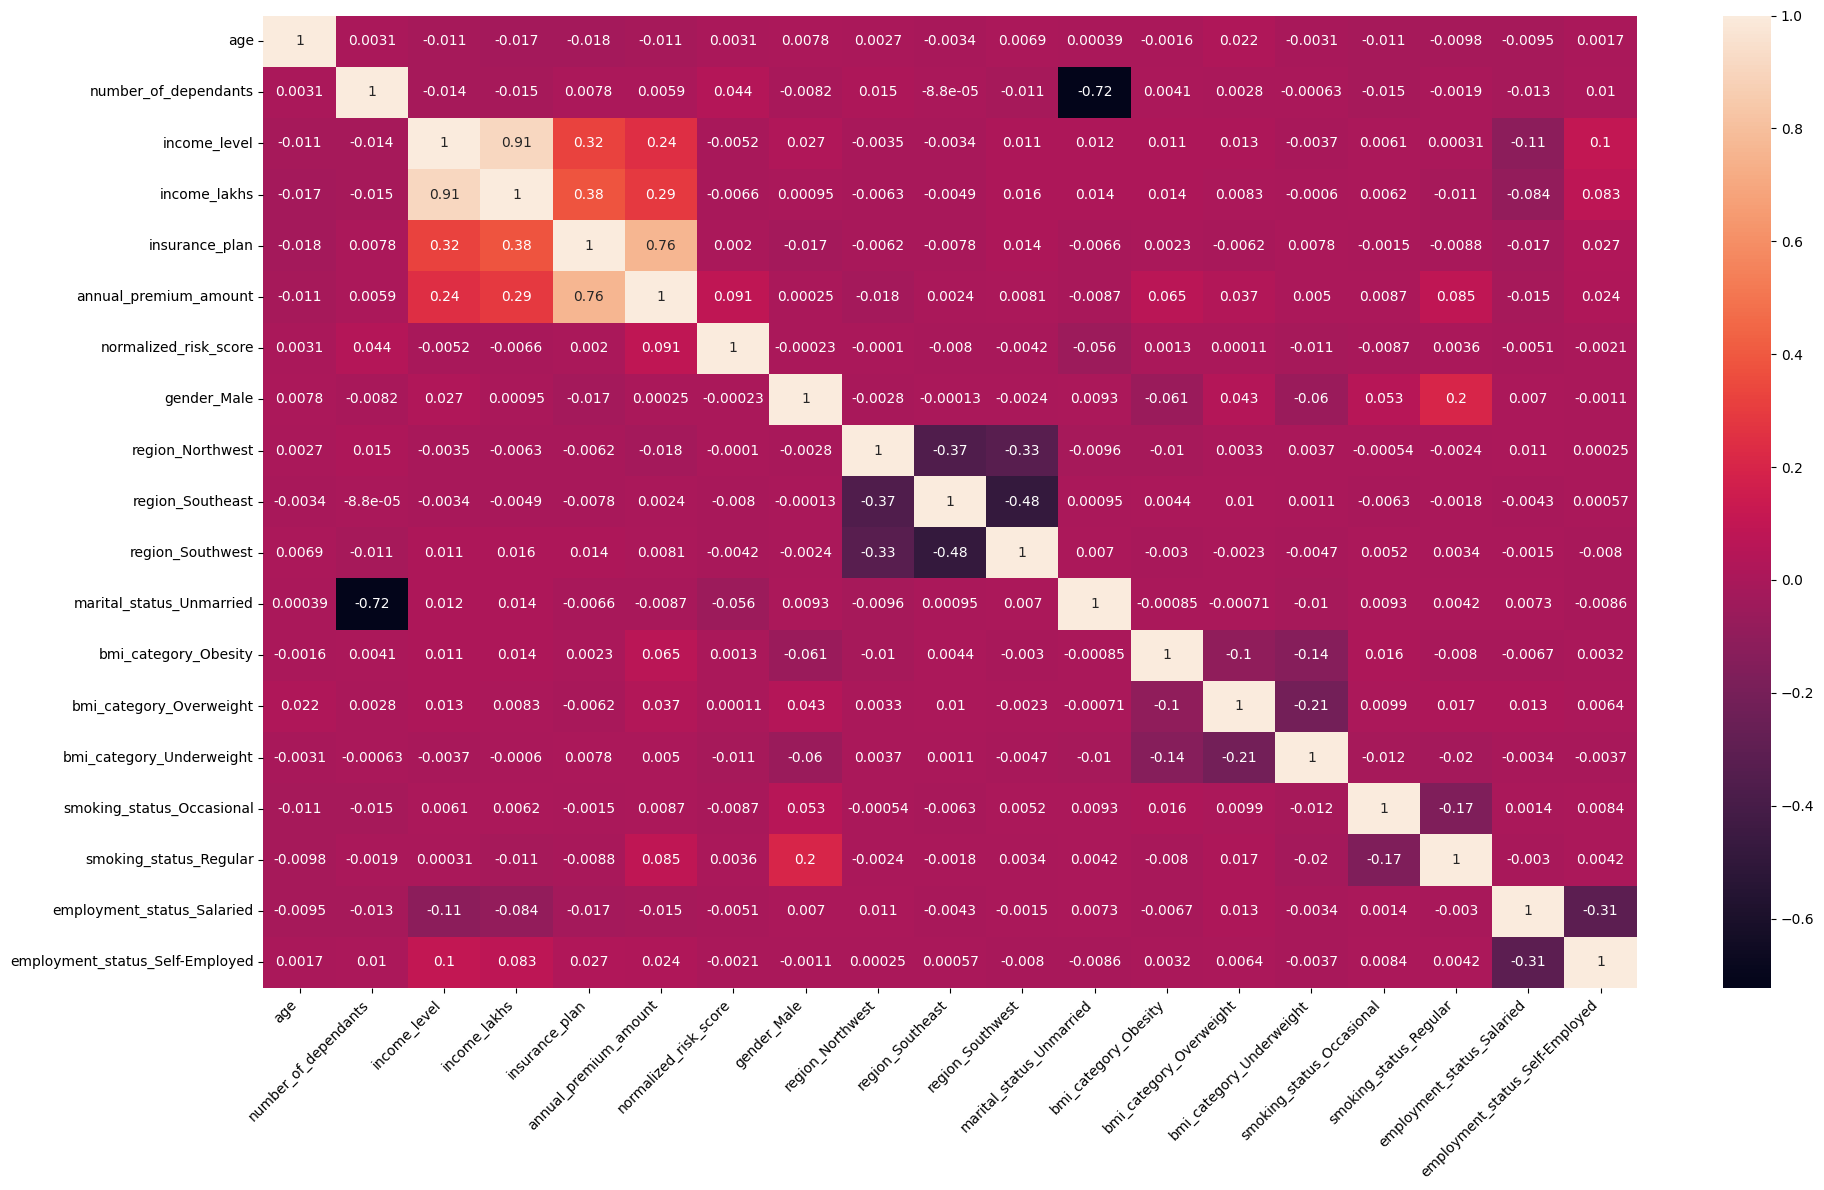

In [107]:
### HEAT MAP OF DATAFRAME
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [108]:

###### SCALING DATA BY MINMAXSCALER
X = df4.drop("annual_premium_amount",axis='columns')
Y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler = MinMaxScaler()
X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
print(X.head())
print(X.describe())

        age  number_of_dependants  income_level  income_lakhs  insurance_plan  \
0  0.000000              0.000000      1.000000      0.989899             0.5   
1  0.571429              0.000000      0.000000      0.020202             0.5   
2  0.428571              0.000000      1.000000      0.969697             0.5   
3  1.000000              0.000000      0.333333      0.141414             0.0   
4  0.285714              0.666667      0.333333      0.131313             0.0   

   normalized_risk_score  gender_Male  region_Northwest  region_Southeast  \
0               0.428571            1                 0                 0   
1               0.000000            0                 1                 0   
2               0.000000            0                 0                 1   
3               0.000000            1                 0                 1   
4               0.000000            1                 0                 1   

   region_Southwest  marital_status_Unmarried  bmi

In [113]:
#### CALCULATING VIF
print('\n')
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [114]:
print("Are there any NaNs?", X.isna().sum().sum())  # Total NaNs
print("Are there any infs?", np.isinf(X).sum().sum())  # Total infs


Are there any NaNs? 0
Are there any infs? 0


In [115]:
X = X.replace([np.inf, -np.inf], np.nan).dropna()


In [119]:
print(calculate_vif(X))


print("\n")
print(calculate_vif(X.drop('income_level',axis= "columns")))




                           Variable        VIF
0                               age   3.142881
1              number_of_dependants   1.860761
2                      income_level  11.928707
3                      income_lakhs  11.874242
4                    insurance_plan   1.592892
5             normalized_risk_score   1.154223
6                       gender_Male   2.310023
7                  region_Northwest   2.147701
8                  region_Southeast   2.970188
9                  region_Southwest   2.730503
10         marital_status_Unmarried   7.326373
11             bmi_category_Obesity   1.109729
12          bmi_category_Overweight   1.232494
13         bmi_category_Underweight   1.367286
14        smoking_status_Occasional   1.132377
15           smoking_status_Regular   1.384145
16       employment_status_Salaried   1.672615
17  employment_status_Self-Employed   1.294963


                           Variable       VIF
0                               age  3.141534
1            

In [120]:
X_reduced = X.drop("income_level",axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [121]:
#### MODEL TRAINING
print('\n')
X_train,X_test,y_train,y_test = train_test_split(X_reduced,Y,test_size=0.3,random_state=10)

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
test_score = model_lr.score(X_test,y_test) ## 92.80%
print(test_score)
train_score = model_lr.score(X_train,y_train)
print(train_score)
print('\n')
print(model_lr.coef_)
print(model_lr.intercept_)



0.6047589163893645
0.6020471274164894


[ 5.51905147e+01 -1.45039643e+02 -3.60667677e+01  7.00007042e+03
  1.11127879e+03  9.82564766e+00 -1.14273450e+02 -3.64663714e+01
 -6.72232248e+01 -5.85343424e+01  7.92952660e+02  4.35760406e+02
  1.69728916e+02  2.44813937e+02  6.19082947e+02 -1.30535485e+01
 -4.34272200e+00]
6614.583391230755


In [122]:
feature_importance = model_lr.coef_

coef_df = pd.DataFrame(feature_importance,index = X_test.columns,columns=['Coefficients'])
print(coef_df)
coef_df = coef_df.sort_values(by='Coefficients')
print(coef_df)

                                 Coefficients
age                                 55.190515
number_of_dependants              -145.039643
income_lakhs                       -36.066768
insurance_plan                    7000.070416
normalized_risk_score             1111.278786
gender_Male                          9.825648
region_Northwest                  -114.273450
region_Southeast                   -36.466371
region_Southwest                   -67.223225
marital_status_Unmarried           -58.534342
bmi_category_Obesity               792.952660
bmi_category_Overweight            435.760406
bmi_category_Underweight           169.728916
smoking_status_Occasional          244.813937
smoking_status_Regular             619.082947
employment_status_Salaried         -13.053549
employment_status_Self-Employed     -4.342722
                                 Coefficients
number_of_dependants              -145.039643
region_Northwest                  -114.273450
region_Southwest                  

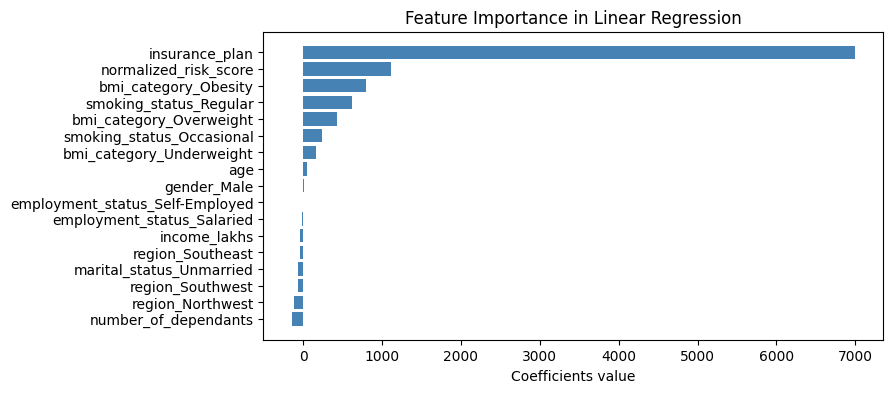

In [123]:
#ploting bar graph of maximum weightage
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color = "steelblue")
plt.xlabel("Coefficients value")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [124]:
#### RIDGE MODEL
model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score = model_rg.score(X_train,y_train)
test_score = model_rg.score(X_test,y_test)
print(train_score,test_score)

0.6020466631305188 0.6047715291063815


In [125]:
#### XGBOOT REGRESSION MODEL

from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score = model_xgb.score(X_train,y_train)
test_score = model_xgb.score(X_test,y_test)
print(train_score,test_score)  ## 98.68 %

0.7251046895980835 0.5638787746429443


In [126]:
##### RANDOM SEARCH CV (MODEL FINING AND TUNING)
model_xgb = XGBRegressor()
param_grid = {
    'n_estimator':[20,40,50],
    'learning_rate' :[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}

random_search = RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=42)
random_search.fit(X_train,y_train)
print(random_search.best_score_)
print(random_search.best_params_)


best_model = random_search.best_estimator_

feature_importance = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importance,index = X_test.columns,columns=['Coefficients'])
print(coef_df)
coef_df = coef_df.sort_values(by='Coefficients')
print(coef_df)

c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:50] WARNING: C:\actions-runner\_wor

0.5990432699521383
{'n_estimator': 20, 'max_depth': 3, 'learning_rate': 0.1}
                                 Coefficients
age                                  0.002145
number_of_dependants                 0.001712
income_lakhs                         0.002238
insurance_plan                       0.917022
normalized_risk_score                0.015588
gender_Male                          0.001936
region_Northwest                     0.001828
region_Southeast                     0.001634
region_Southwest                     0.002377
marital_status_Unmarried             0.002393
bmi_category_Obesity                 0.011324
bmi_category_Overweight              0.010142
bmi_category_Underweight             0.003373
smoking_status_Occasional            0.004172
smoking_status_Regular               0.017631
employment_status_Salaried           0.001865
employment_status_Self-Employed      0.002620
                                 Coefficients
region_Southeast                     0.001634
num

c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


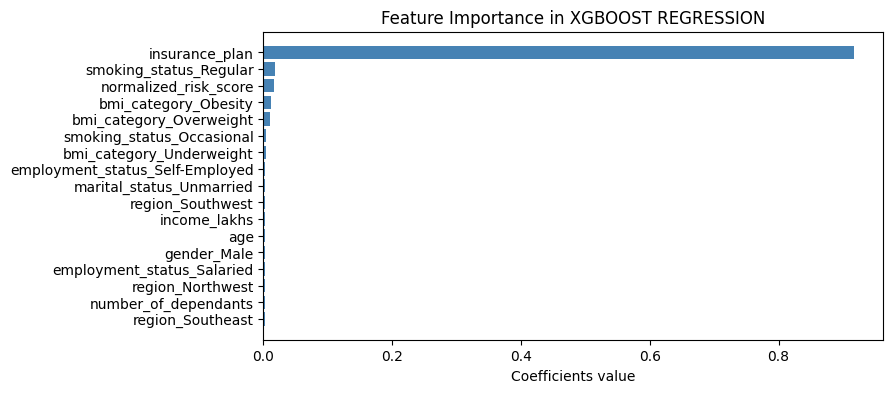

In [127]:
#ploting bar graph of maximum weightage
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color = "steelblue")
plt.xlabel("Coefficients value")
plt.title("Feature Importance in XGBOOST REGRESSION")
plt.show()